In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 18

import seaborn as sns
sns.set_context('poster');

In [5]:
df = pd.read_csv('data/gapminder_data.csv')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [10]:
df.columns = ['country', 'continent', 'year', 'life_exp', 'pop', 'gdp_per_cap']
df.describe()

,year,life_exp,pop,gdp_per_cap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [14]:
df['decade'] = pd.cut(df['year'], bins = range(1950, 2010, 10))

In [15]:
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap,decade
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,"(1950, 1960]"
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,"(1950, 1960]"
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,"(1960, 1970]"
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,"(1960, 1970]"
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,"(1970, 1980]"


In [21]:
most_recent = df[df.year == 2007].drop(columns=['decade', 'year'])

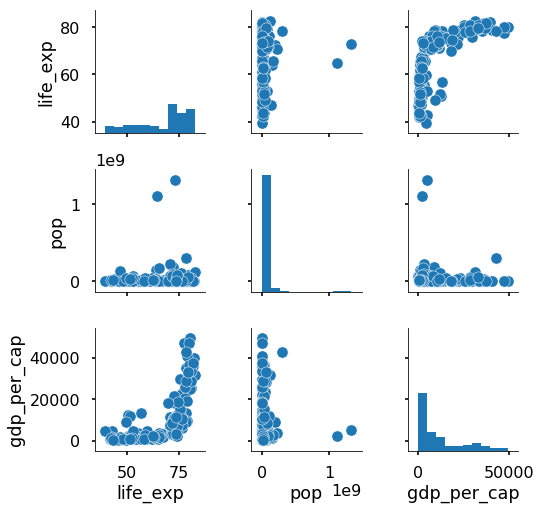

In [22]:
sns.pairplot(most_recent);

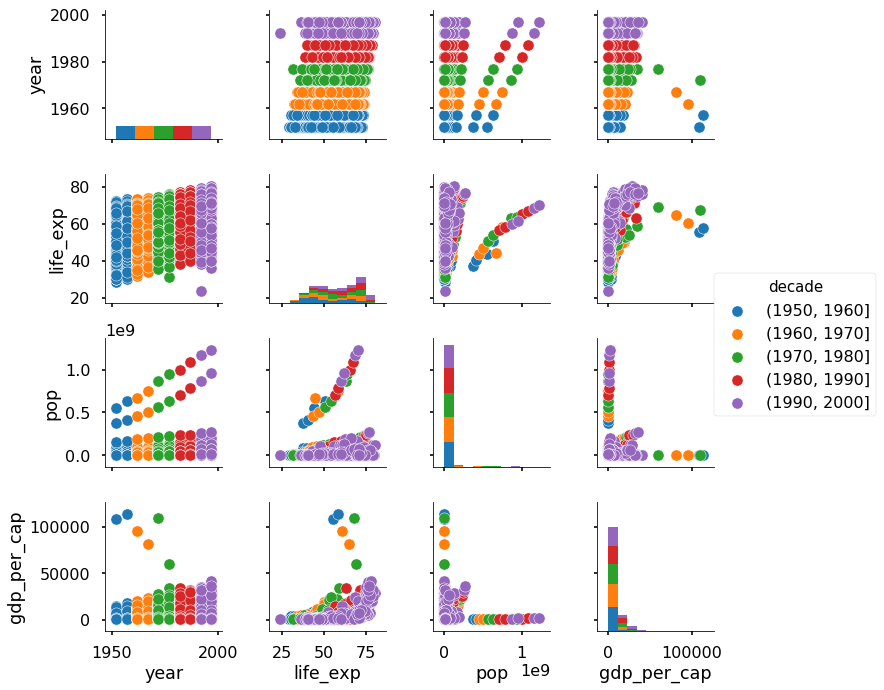

In [16]:
sns.pairplot(df, hue = 'decade');